<a href="https://colab.research.google.com/github/FGalvao77/others-knowledge-in-python-for-data-science/blob/main/Guia_sobre_Coleta_de_Dados_na_Web_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guia sobre Coleta de Dados na Web com Python**

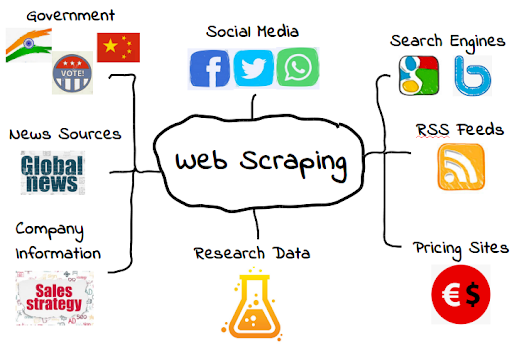

**O que é ``Web Scraping`` (coleta de dados na web )?**

A ``coleta de dados web``, ou ``raspagem web``, é uma forma de mineração que permite a extração de dados de sites da web convertendo-os em informação estruturada para posterior análise. O tipo mais básico de coleta é o download manual das páginas, copiando e colando o conteúdo, e isso pode ser feito por qualquer pessoa. Contudo, essa técnica geralmente é feita através de um software que simula uma navegação humana por diversos sites, extraindo informações específicas. 

É um campo com ativa evolução que compartilha um objetivo comum com a visão da web semântica, uma iniciativa ambiciosa que ainda requer avanços no processamento de texto, compreensão semantical, inteligência artificial e interação humano-computador. 

A coleta de dados web é muito semelhante à indexação web (utilizado pela maioria dos motores de busca), mas a motivação final é muito diferente. A indexação web é usada para ajudar a tornar os motores de busca mais eficientes, já a coleta de dados é tipicamente usada para diferentes razões, como comparação de preços online, monitoramentos meteorológicos, pesquisas de mercado, coleta de dados governamentais, monitoramento de dados e, em alguns casos, roubo.

**O que é o Beautiful Soup?**

``Beautiful Soup`` é um pacote Python para análise de documentos HTML e XML. 

Ele cria uma árvore de análise para páginas analisadas que podem ser usadas para extrair dados de HTML, o que é útil para web scraping.

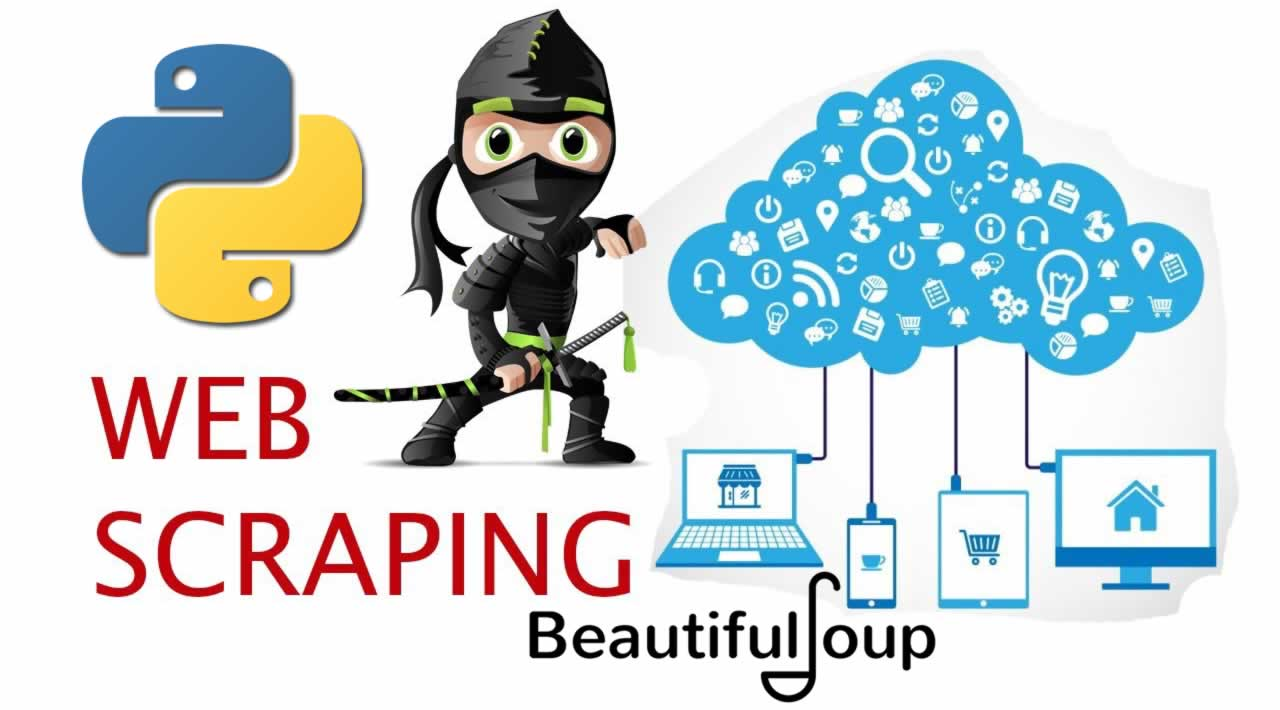

- Documentação Beautiful Soup:
  - https://www.crummy.com/software/BeautifulSoup/bs4/doc.ptbr/

## **Vamos pra prática!**

**Vamos importar as bibliotecas externas que precisamos**

In [2]:
# importando as bibliotecas necessárias
import requests   # é para fazer requições web
from bs4 import BeautifulSoup   # para realizar o scraping
import pandas as pd   # para modelagem de dados

**Vamos importar as bibliotecas externas que precisamos**

In [3]:
# carregando a página web e salvando na variável "url"
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Santa_Catarina'

In [4]:
# realizando o carregamento da página com o "requests" para "pagina_web"
pagina_web = requests.get(url)

**Transpondo as informações do Request para o Soup**

In [5]:
# coletando informações com "BeatifullSoup" da variável "pagina_web"
raspagem = BeautifulSoup(pagina_web.text, 'html.parser')
raspagem


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Lista de municípios de Santa Catarina – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"d9b313e2-05b7-46c3-87fd-0abd492b4b01","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Lista_de_municípios_de_Santa_Catarina","wgTitle":"Lista de municípios de Santa Catarina","wgCurRevisionId":60101904,"wgRevisionId":60101904,"wgArticleId":286060,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Listas de municípios de Santa Catarina"],"wgPageContentLanguage":"

**Extraindo algumas informações da nossa raspagem**

In [6]:
# coletando o título da página
print(raspagem.title)

<title>Lista de municípios de Santa Catarina – Wikipédia, a enciclopédia livre</title>


In [7]:
# coletando o nome da tag
print(raspagem.title.name)

title


**Buscando uma tag específica de acordo com o nome dela**

In [8]:
# coletando uma classe pelo nome
busca = raspagem.find(class_ = 'p-search--show-thumbnail')
busca

<div class="p-search--show-thumbnail" id="p-search" role="search">
<h3>
<label for="searchInput">Busca</label>
</h3>
<form action="/w/index.php" id="searchform">
<div data-search-loc="header-moved" id="simpleSearch">
<input accesskey="f" autocapitalize="sentences" id="searchInput" name="search" placeholder="Pesquisar na Wikipédia" title="Pesquisar na Wikipédia [f]" type="search">
<input name="title" type="hidden" value="Especial:Pesquisar"/>
<input class="searchButton mw-fallbackSearchButton" id="mw-searchButton" name="fulltext" title="Procurar páginas que contêm este texto" type="submit" value="Pesquisar"/>
<input class="searchButton" id="searchButton" name="go" title="Ir para uma página com este nome exacto, caso exista" type="submit" value="Ir"/>
</input></div>
</form>
</div>

**Buscando todas as tags da página**

In [13]:
# retornando todas as tags da página com um parâmetro
print(raspagem.p)
print('*******************************************************************************************************************************\n')
print(raspagem.div)
print('*******************************************************************************************************************************\n')
print(raspagem.a)

<p>Os <b>municípios de Santa Catarina</b> são as subdivisões políticas do <a class="mw-redirect" href="/wiki/Estados_do_Brasil" title="Estados do Brasil">estado brasileiro</a> de <a href="/wiki/Santa_Catarina" title="Santa Catarina">Santa Catarina</a>. O governo de cada <a href="/wiki/Munic%C3%ADpio" title="Município">município</a> é responsável por lidar com os deveres a nível local. A administração do município é conduzida por um <a href="/wiki/Prefeito" title="Prefeito">prefeito</a>, uma <a class="mw-redirect" href="/wiki/C%C3%A2mara_de_Vereadores" title="Câmara de Vereadores">Câmara de Vereadores</a>, e um <a href="/wiki/F%C3%B3rum" title="Fórum">Fórum Municipal</a>.
</p>
*******************************************************************************************************************************

<div class="mw-page-container">
<a class="mw-jump-link" href="#content">Saltar para o conteúdo</a>
<div class="mw-page-container-inner">
<input checked="" class="mw-checkbox-hack-checkbo

**Identificando a nomenclatura de uma tag**

In [17]:
# visualizando o nome da classe de uma tag
print(raspagem.a['class'])
print(raspagem.span['class'])

['mw-jump-link']
['mw-logo-container']


**Identificando todas as tag de acordo com um parâmetro**

In [18]:
# visualizando todas as tags com um parâmetro
raspagem.find_all('a')

[<a class="mw-jump-link" href="#content">Saltar para o conteúdo</a>,
 <a class="mw-logo" href="/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal">
 <img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/mobile/copyright/wikipedia-pt-20.png" width="50"/>
 <span class="mw-logo-container">
 <img alt="Wikipédia" class="mw-logo-wordmark" height="30" src="/static/images/mobile/copyright/wikipedia-wordmark-pt-20.svg" width="119"/>
 <img alt="" class="mw-logo-tagline" height="13" src="/static/images/mobile/copyright/wikipedia-tagline-pt.svg" width="113"/>
 </span>
 </a>,
 <a accesskey="n" href="/wiki/Especial:Minha_discuss%C3%A3o" title="Discussão sobre edições feitas a partir deste endereço IP [n]">Discussão</a>,
 <a accesskey="y" href="/wiki/Especial:Minhas_contribui%C3%A7%C3%B5es" title="Uma lista de edições feitas a partir deste endereço IP [y]">Contribuições</a>,
 <a href="/w/index.php?title=Especial:Criar_conta&amp;returnto=Lista+de+munic%C3%ADpios+de+Santa+Catarina

**Procurando um Id pelo seu nome**

In [19]:
# passando um Id específico da página
raspagem.find(id ='p-search')

<div class="p-search--show-thumbnail" id="p-search" role="search">
<h3>
<label for="searchInput">Busca</label>
</h3>
<form action="/w/index.php" id="searchform">
<div data-search-loc="header-moved" id="simpleSearch">
<input accesskey="f" autocapitalize="sentences" id="searchInput" name="search" placeholder="Pesquisar na Wikipédia" title="Pesquisar na Wikipédia [f]" type="search">
<input name="title" type="hidden" value="Especial:Pesquisar"/>
<input class="searchButton mw-fallbackSearchButton" id="mw-searchButton" name="fulltext" title="Procurar páginas que contêm este texto" type="submit" value="Pesquisar"/>
<input class="searchButton" id="searchButton" name="go" title="Ir para uma página com este nome exacto, caso exista" type="submit" value="Ir"/>
</input></div>
</form>
</div>

**Percorrendo uma consulta e extraindo uma informação em específica**

In [20]:
# realizando um loop para coletar os links da página
for link in raspagem.find_all('a'):
  print(link.get('href'))

#content
/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal
/wiki/Especial:Minha_discuss%C3%A3o
/wiki/Especial:Minhas_contribui%C3%A7%C3%B5es
/w/index.php?title=Especial:Criar_conta&returnto=Lista+de+munic%C3%ADpios+de+Santa+Catarina
/w/index.php?title=Especial:Entrar&returnto=Lista+de+munic%C3%ADpios+de+Santa+Catarina
/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal
/wiki/Portal:Conte%C3%BAdo_destacado
/wiki/Portal:Eventos_atuais
/wiki/Wikip%C3%A9dia:Esplanada
/wiki/Especial:Aleat%C3%B3ria
/wiki/Portal:%C3%8Dndice
/wiki/Wikip%C3%A9dia:Informe_um_erro
/wiki/Wikip%C3%A9dia:Boas-vindas
/wiki/Ajuda:P%C3%A1gina_principal
/wiki/Ajuda:P%C3%A1gina_de_testes
/wiki/Wikip%C3%A9dia:Portal_comunit%C3%A1rio
/wiki/Especial:Mudan%C3%A7as_recentes
/wiki/Wikip%C3%A9dia:Manuten%C3%A7%C3%A3o
/wiki/Ajuda:Guia_de_edi%C3%A7%C3%A3o/Como_come%C3%A7ar_uma_p%C3%A1gina
/wiki/Especial:P%C3%A1ginas_novas
/wiki/Wikip%C3%A9dia:Contato
//donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&ut

**Retornando apenas os textos da página**

In [21]:
# coletando apenas o que for texto da página
print(raspagem.get_text())





Lista de municípios de Santa Catarina – Wikipédia, a enciclopédia livre
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"d9b313e2-05b7-46c3-87fd-0abd492b4b01","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Lista_de_municípios_de_Santa_Catarina","wgTitle":"Lista de municípios de Santa Catarina","wgCurRevisionId":60101904,"wgRevisionId":60101904,"wgArticleId":286060,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Listas de municípios de Santa Catarina"],"wgPageContentLanguage":"pt","wgPageContentModel":"wikitext","wgRelevantPageName":"Lista_de_municípios_de_Santa_Catarina","wgRelevantArticl

**Identificando onde está os dados no site**

In [23]:
# coletando todas as "tbody" e transformando-os em uma lista
tabelas = list(raspagem.find_all('tbody'))
tabelas

[<tbody><tr>
 <td style="word-spacing:4px;"><b>Índice:</b>     <span title="Voltar para o topo da página"><a href="#top">▲</a></span>  <b>·</b>  <a href="#A">A</a> <a href="#B">B</a> <a href="#C">C</a> <a href="#D">D</a> <a href="#E">E</a> <a href="#F">F</a> <a href="#G">G</a> <a href="#H">H</a> <a href="#I">I</a> <a href="#J">J</a> <a href="#K">K</a> <a href="#L">L</a> <a href="#M">M</a> <a href="#N">N</a> <a href="#O">O</a> <a href="#P">P</a> <a href="#Q">Q</a> <a href="#R">R</a> <a href="#S">S</a> <a href="#T">T</a> <a href="#U">U</a> <a href="#V">V</a> <a href="#W">W</a> <a href="#X">X</a> <a href="#Y">Y</a> <a href="#Z">Z</a>
 </td></tr></tbody>, <tbody><tr>
 <th>#</th>
 <th width="240px"><a class="mw-redirect" href="/wiki/Munic%C3%ADpios_do_Brasil" title="Municípios do Brasil">Município</a></th>
 <th>Código<br/>IBGE</th>
 <th>Localização
 </th></tr>
 <tr id="A">
 <td>1</td>
 <td style="text-align:left;"><a href="/wiki/Abdon_Batista_(Santa_Catarina)" title="Abdon Batista (Santa Ca

**Criando um script para coletar as informações acima**

In [32]:
# instanciando listas vazias para auxiliar na construção da nossa base
cidades = []
estado = []
id = []

# instanciando a variável "loop" para ser usada no for
loop = 0

# realizando loop nas tags "a"
for texto in tabelas[1].find_all('a'):
  # estraindo apenas o texto da tag
  cidade = texto.string

  # caso o valor venha vazio será ignorado
  if cidade == None:
    pass

  # se o valor for uma cidade, entra no "else"
  else:
    # salvando os dados nas lista
    cidades.append(cidade)
    estado.append('Santa Catarina')
    id.append(loop)

    # somando o loop para virar o id na base de dados
    loop += 1

# criando um dicionário para estruturar os dados
dicionario_dados = {
    'Id' : id,
    'Cidade' : cidades,
    'Estado' : estado
}

# passando o dicionário criado com parâmetro do dataframe
base_cidades = pd.DataFrame(dicionario_dados)

# visualizando as 10 primeiras linhas do dataframe instanciado
base_cidades.head(10)

,Id,Cidade,Estado
0,0,Município,Santa Catarina
1,1,Abdon Batista,Santa Catarina
2,2,Abelardo Luz,Santa Catarina
3,3,Agrolândia,Santa Catarina
4,4,Agronômica,Santa Catarina
5,5,Água Doce,Santa Catarina
6,6,Águas de Chapecó,Santa Catarina
7,7,Águas Frias,Santa Catarina
8,8,Águas Mornas,Santa Catarina
9,9,Alfredo Wagner,Santa Catarina


**Final**

Esse guia rápido é para ter conhecimentos prévios sobre como utilizar a
biblioteca ``BeautifulSoup`` para processos de Web Scraping.

Caso queira mais informações, acesse a documentação oficial do
framework.



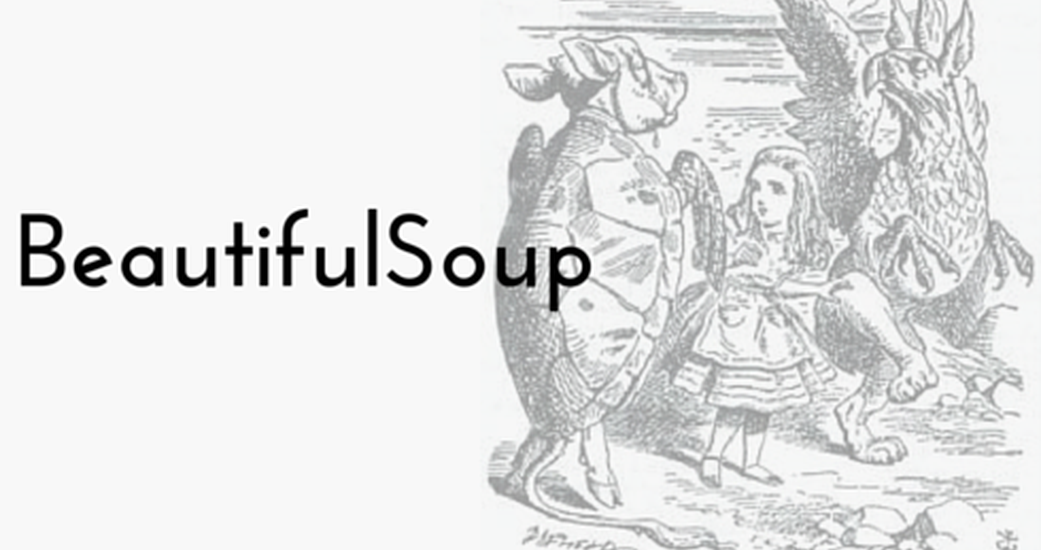